In [91]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.axes as ax
from sklearn.linear_model import LinearRegression

In [80]:
df=pd.read_csv("data_for_lr.csv")
df.head()

,x,y
0,24.0,21.549452
1,50.0,47.464463
2,15.0,17.218656
3,38.0,36.586398
4,87.0,87.288984


In [81]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x       700 non-null    float64
 1   y       699 non-null    float64
dtypes: float64(2)
memory usage: 11.1 KB


In [82]:
df=df.dropna()

In [83]:
# training dataset and labels
train_input = np.array(df.x[0:500]).reshape(500,1)
train_output  = np.array(df.y[0:500]).reshape(500,1)

# valid dfset and labels
test_input = np.array(df.x[500:700]).reshape(199,1)
test_output  = np.array(df.y[500:700]).reshape(199,1)

# print the shapes
print("Train Input Shape = {}".format(train_output.shape))
print("Train Output  Shape = {}".format(train_output.shape))
print("Test Input Shape = {}".format(test_input.shape))
print("Test Output  Shape = {}".format(test_output.shape))

Train Input Shape = (500, 1)
Train Output  Shape = (500, 1)
Test Input Shape = (199, 1)
Test Output  Shape = (199, 1)


#### forward propagation

# y=mx+b

In [84]:
def forwardpropagation(trainingInput, parameters):
    m=parameters["m"]
    c=parameters["c"]
    predictions=np.multiply(m,trainingInput)+c
    return predictions


#### cost function

In [85]:
def costfunction(predictions, trainingoutput):
    cost=np.mean((predictions-trainingoutput)**2)*0.5
    return cost


#### gradient descent / back propagation

In [86]:
def backpropagation(traininginput,trainingoutput, predictions):
    derivatives = dict()
    df = (trainingoutput - predictions) * -1
    dm = np.mean(np.multiply(traininginput, df))
    dc = np.mean(df)
    derivatives['dm'] = dm
    derivatives['dc'] = dc
    return derivatives

### update parameters

In [87]:
def updateparameters(parameters, derivatives, learningrate):
    parameters["m"]=parameters["m"]-learningrate*derivatives["dm"]
    parameters["c"]=parameters["c"]-learningrate*derivatives["dc"]
    return parameters

#### train data

forward propagation
cost function
backward propagation
update parameters
 

In [88]:
def train(traininginput, trainingoutput, learningrate, epochs):
    #initialize parameters
    parameters=dict()
    parameters["m"]=np.random.uniform(0,1)*-1
    parameters["c"]=np.random.uniform(0,1)*-1
    plt.figure()
    loss=[]
    for i in range(epochs):
        predictions=forwardpropagation(traininginput,parameters)
        cost=costfunction(predictions,trainingoutput)
        loss.append(cost)
        print("Epoch = {}, Loss = {}".format(i+1, cost))
        #plot function
        fig, ax = plt.subplots()
        ax.plot(train_input, train_output, '+', label='Original')
        ax.plot(train_input, predictions, '*', label='Training')
        legend = ax.legend()
        plt.plot(train_input, train_output, '+')
        plt.plot(train_input, predictions, '*')        
        plt.show()
        derivatives=backpropagation(traininginput,trainingoutput,predictions)
        parameters=updateparameters(parameters,derivatives,learningrate)
    return parameters, loss


Epoch = 1, Loss = 1930.907708389151


<Figure size 640x480 with 0 Axes>

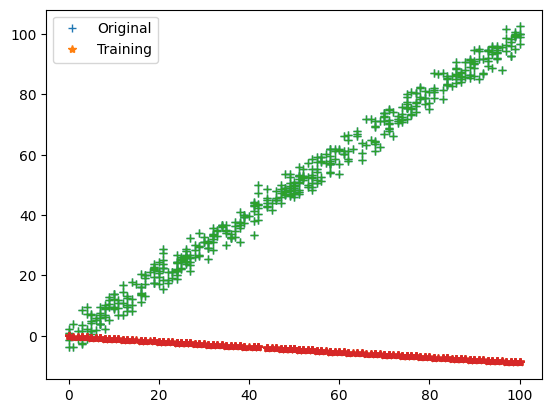

Epoch = 2, Loss = 878.1913973534389


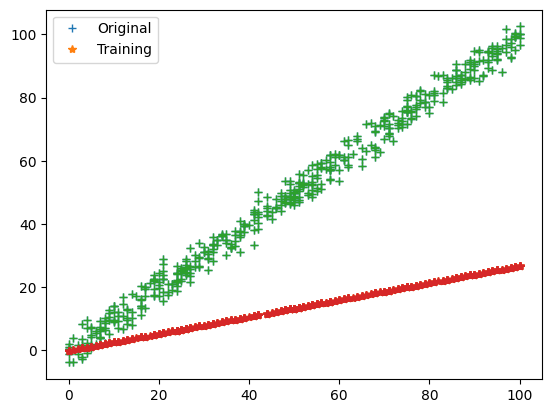

Epoch = 3, Loss = 400.5728409941966


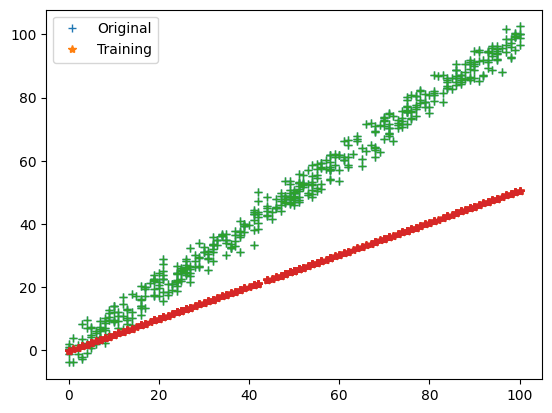

Epoch = 4, Loss = 183.8767729336444


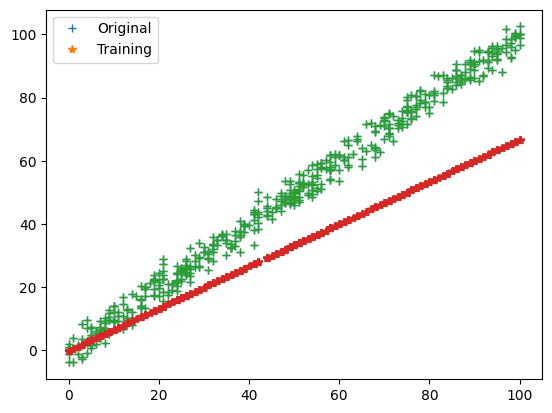

Epoch = 5, Loss = 85.56152682271001


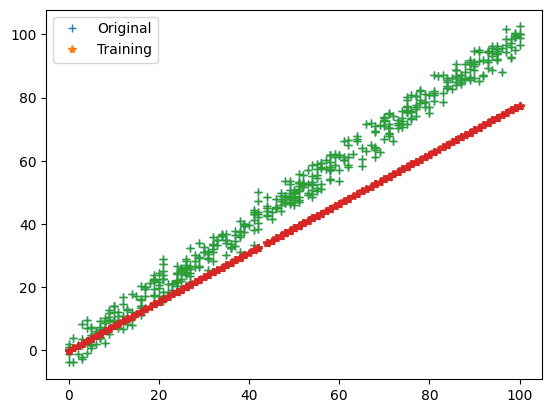

Epoch = 6, Loss = 40.955790753795235


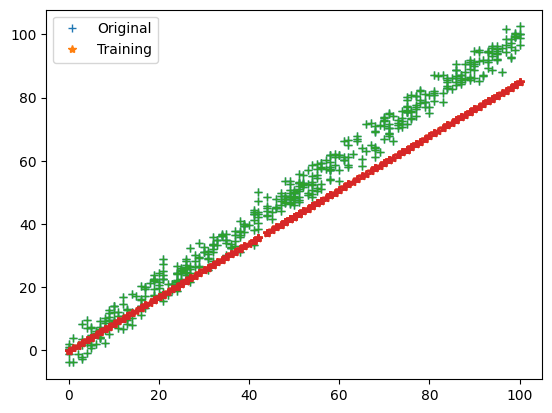

Epoch = 7, Loss = 20.718118881812188


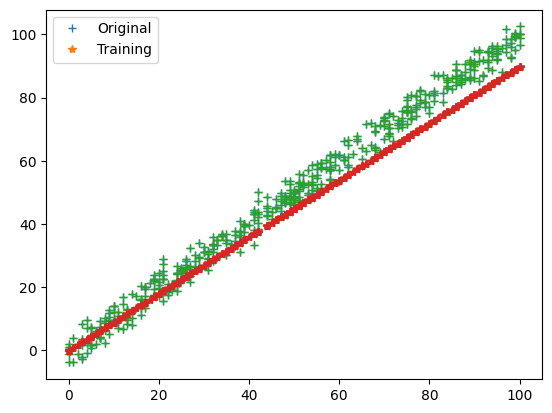

Epoch = 8, Loss = 11.536264727049806


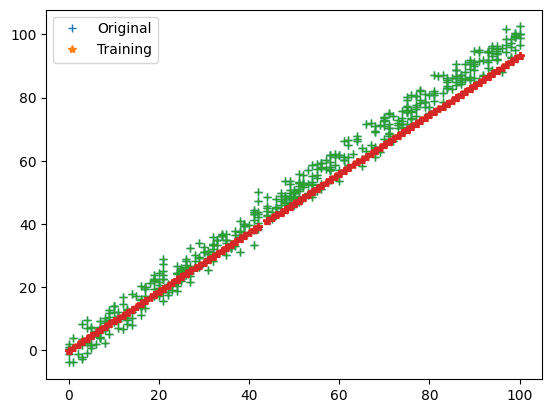

Epoch = 9, Loss = 7.370447316470322


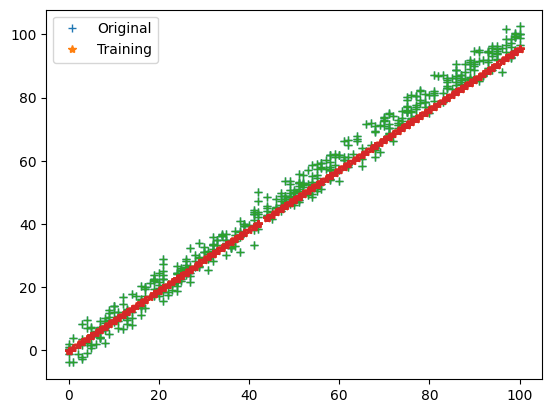

Epoch = 10, Loss = 5.480411332696154


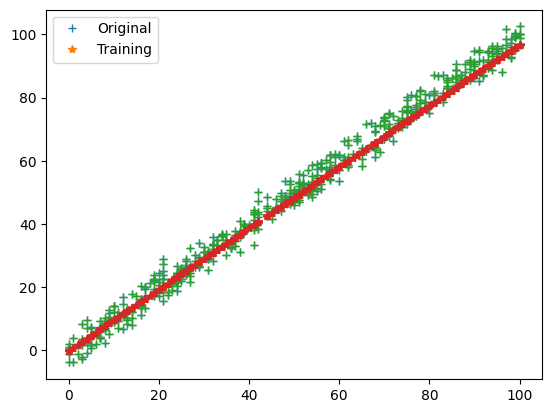

Epoch = 11, Loss = 4.622899903013385


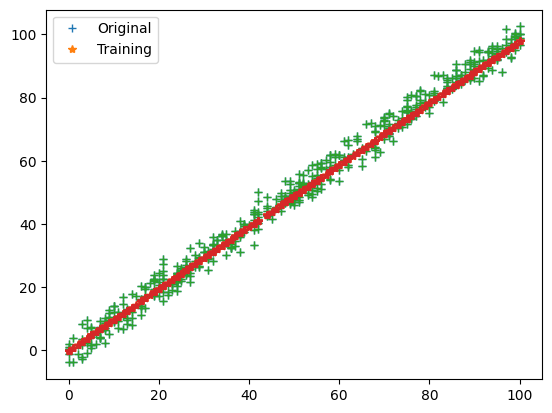

Epoch = 12, Loss = 4.233846007189155


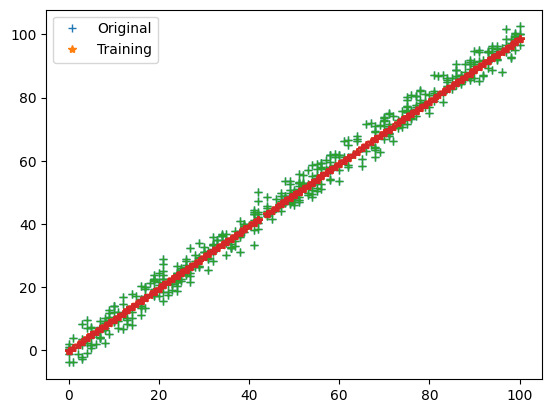

Epoch = 13, Loss = 4.057331813359946


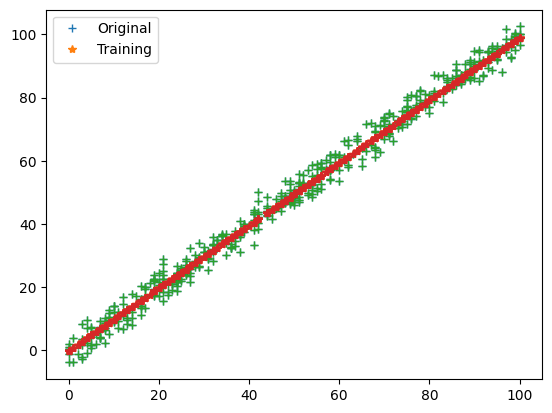

Epoch = 14, Loss = 3.977247117744128


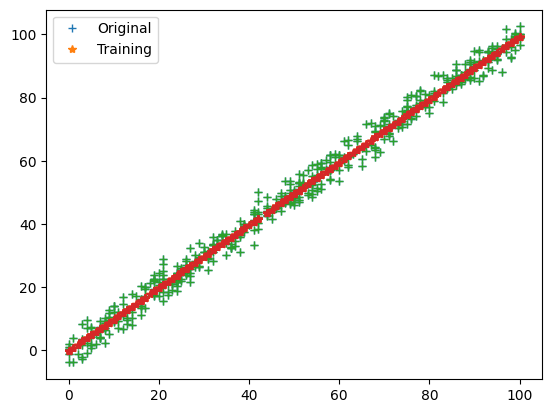

Epoch = 15, Loss = 3.9409125922775354


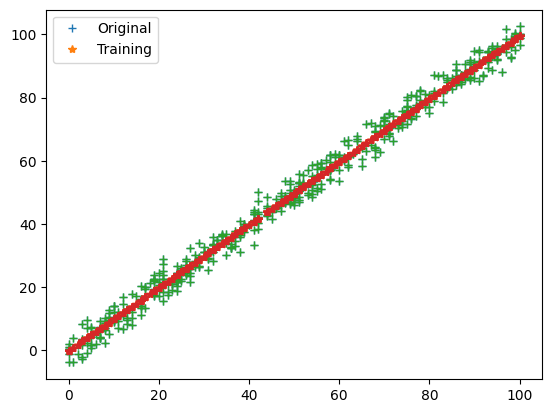

Epoch = 16, Loss = 3.924427567467659


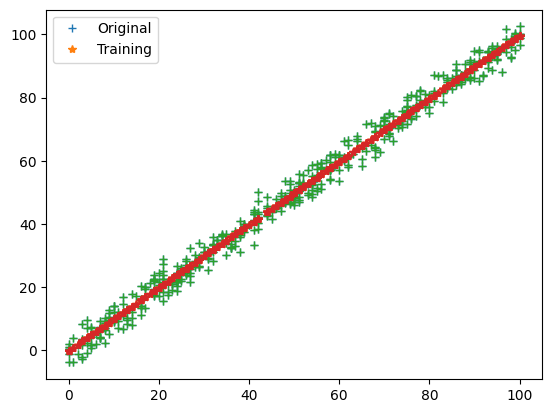

Epoch = 17, Loss = 3.9169482830923834


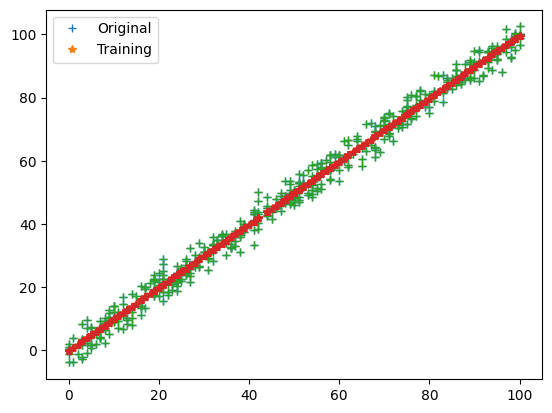

Epoch = 18, Loss = 3.913554913127936


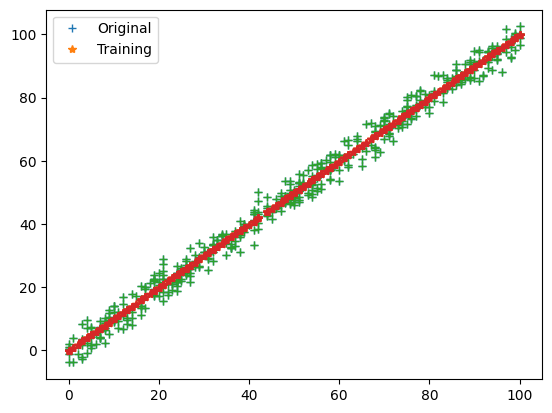

Epoch = 19, Loss = 3.91201532705793


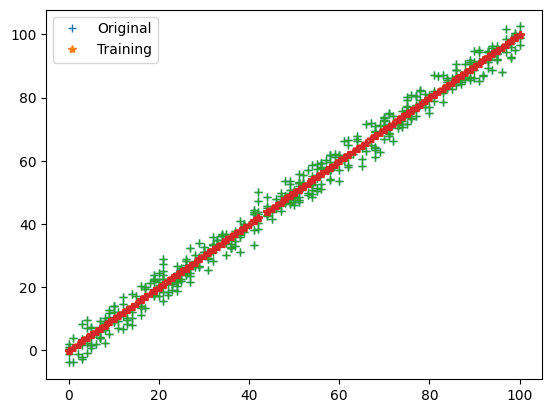

Epoch = 20, Loss = 3.911316804794682


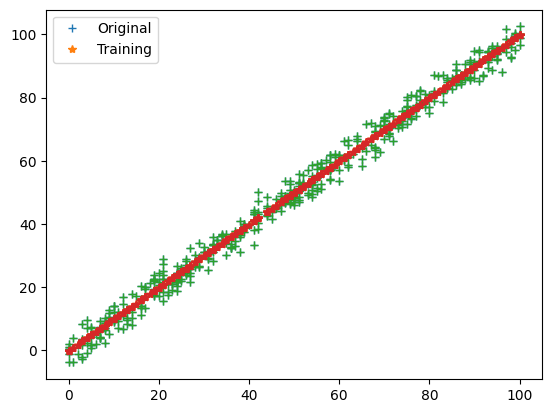

In [89]:
parameters, loss=train(train_input,train_output,0.0001,20)

In [92]:
linearregressor=LinearRegression()
linearregressor.fit(train_input,train_output)
ypred=linearregressor.predict(test_input)

In [93]:
from sklearn.metrics import mean_squared_error
cost=mean_squared_error(test_output,ypred)

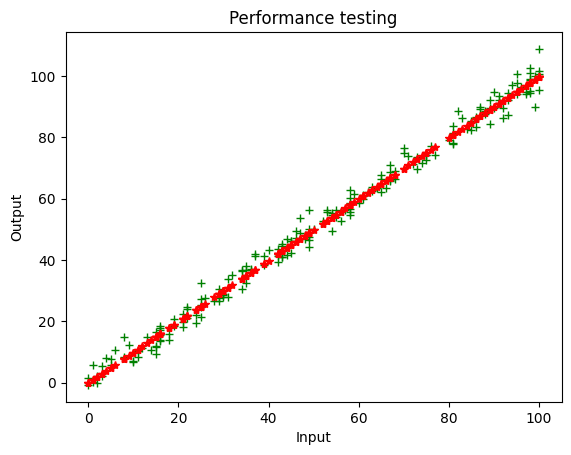

In [94]:
plt.plot(test_input, test_output, '+', color = "green")
plt.plot(test_input, ypred, '*', color = "red")
plt.title("Performance testing")
plt.xlabel("Input")
plt.ylabel("Output")
plt.show()